# **Statistiques descriptives sur une base de données macro**

### Préparation de l'environnement et importation de la base

---



In [156]:
#Chargement des packages
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [ ]:
#Chargement de la base de données sur google colab
from google.colab import files
files.upload() 


In [270]:
bdd = pd.read_excel('1-Data_all_.xlsx')
db = pd.DataFrame(data=bdd)

Pour cette analyse des statistiques descriptives nous nous concentrerons sur l'année 2016 (la base de données étant constituée des mêmes variables sur les deux années).

In [271]:
db = db.iloc[:,:25] #on séléctionne toutes les lignes et toutes les colonnes jusqu'à la dernière variable "2016"

In [272]:
db.columns #vérification 

Index(['Name', 'CROIS_2016', 'ELEC_2016', 'PI_2016', 'VA_2016', 'TTR_2016',
       'TXMORTI_2016', 'TXMORT_2016', 'IED_2016', 'EDVN_2016', 'PT_2016',
       'INF_2016', 'MASSM_2016', 'TXCH_2016', 'PA_2016', 'TRSM_2016',
       'CHO_2016', 'CMARCH_2016', 'X_2016', 'M_2016', 'FBCF_2016', 'TXF_2016',
       'TRSPRT_2016', 'ABTE_2016', 'TAGR_2016'],
      dtype='object')

In [160]:
db.shape

(241, 25)

### Petite analyse *exploratoire*

---



In [273]:
db.info() #toutes nos variables sont correctement codées

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          241 non-null    object 
 1   CROIS_2016    230 non-null    float64
 2   ELEC_2016     239 non-null    float64
 3   PI_2016       181 non-null    float64
 4   VA_2016       217 non-null    float64
 5   TTR_2016      165 non-null    float64
 6   TXMORTI_2016  218 non-null    float64
 7   TXMORT_2016   229 non-null    float64
 8   IED_2016      223 non-null    float64
 9   EDVN_2016     224 non-null    float64
 10  PT_2016       240 non-null    float64
 11  INF_2016      231 non-null    float64
 12  MASSM_2016    181 non-null    float64
 13  TXCH_2016     196 non-null    float64
 14  PA_2016       211 non-null    float64
 15  TRSM_2016     188 non-null    float64
 16  CHO_2016      211 non-null    float64
 17  CMARCH_2016   225 non-null    float64
 18  X_2016        211 non-null    

In [274]:
#round(db.describe(),2)

,CROIS_2016,ELEC_2016,PI_2016,VA_2016,TTR_2016,TXMORTI_2016,TXMORT_2016,IED_2016,EDVN_2016,PT_2016,...,TRSM_2016,CHO_2016,CMARCH_2016,X_2016,M_2016,FBCF_2016,TXF_2016,TRSPRT_2016,ABTE_2016,TAGR_2016
count,230.00,239.00,1.810000e+02,2.170000e+02,1.650000e+02,2.180000e+02,229.00,2.230000e+02,2.240000e+02,2.400000e+02,...,1.880000e+02,2.110000e+02,225.00,211.00,211.00,195.00,223.00,179.00,224.00,233.00
mean,3.19,84.63,1.106144e+10,3.101873e+06,6.467742e+10,1.771988e+09,7.69,8.049165e+10,5.949071e+08,2.836324e+08,...,3.764767e+10,1.793270e+08,56.69,39.82,44.99,24.45,2.79,1439106.49,1157.83,1811498.23
std,3.36,25.11,5.051869e+10,4.569327e+07,2.713801e+11,2.616309e+10,2.52,3.178524e+11,8.903754e+09,9.612549e+08,...,1.643469e+11,2.604875e+09,31.20,34.34,26.97,13.67,1.77,4387159.09,15733.33,5657930.55
min,-8.82,2.18,0.000000e+00,4.300000e-01,1.080000e+00,2.100000e+00,1.15,-2.893934e+10,5.159000e+01,8.423000e+01,...,1.600000e+06,1.500000e-01,3.39,0.71,0.74,7.75,1.20,1.20,24.92,3.00
25%,1.67,78.99,4.747852e+05,7.640000e+00,7.936540e+08,7.780000e+00,6.10,1.621336e+08,6.783000e+01,1.218262e+06,...,4.385000e+08,4.310000e+00,37.79,21.23,26.50,19.30,1.75,12060.00,84.41,4348.00
50%,3.18,99.40,1.638314e+07,1.138000e+01,4.886385e+09,1.848000e+01,7.39,1.246900e+09,7.352000e+01,9.003731e+06,...,1.867500e+09,6.010000e+00,48.29,31.26,39.02,22.74,2.29,55261.00,110.01,48754.00
75%,4.69,100.00,5.642275e+08,1.568000e+01,3.188735e+10,4.703000e+01,9.03,1.553764e+10,7.752000e+01,4.131114e+07,...,9.977469e+09,9.920000e+00,68.30,47.56,55.13,26.70,3.58,514206.00,126.83,410097.10
max,29.21,100.00,3.329793e+11,6.731039e+08,3.097658e+12,3.862935e+11,15.16,2.733835e+12,1.332592e+11,7.433651e+09,...,1.541143e+12,3.783800e+10,192.52,331.35,187.01,184.72,21.49,34687965.00,235581.00,47232387.38


In [161]:
db.isna().sum()

Name             0
CROIS_2016      11
ELEC_2016        2
PI_2016         60
VA_2016         24
TTR_2016        76
TXMORTI_2016    23
TXMORT_2016     12
IED_2016        18
EDVN_2016       17
PT_2016          1
INF_2016        10
MASSM_2016      60
TXCH_2016       45
PA_2016         30
TRSM_2016       53
CHO_2016        30
CMARCH_2016     16
X_2016          30
M_2016          30
FBCF_2016       46
TXF_2016        18
TRSPRT_2016     62
ABTE_2016       17
TAGR_2016        8
dtype: int64

In [162]:
na_list = db.isna().sum()
sum(na_list >= 30)

#j'aimerais supprimer les variables avec trop de NA : 

#for i in db.columns:
  #if na_list.values >= 30:
    #print(db[:,i])

#Echec, je fais sans.

11

In [275]:
db.dropna(inplace=True)

In [ ]:
#db.isna().sum()

Name            0
CROIS_2016      0
ELEC_2016       0
PI_2016         0
VA_2016         0
TTR_2016        0
TXMORTI_2016    0
TXMORT_2016     0
IED_2016        0
EDVN_2016       0
PT_2016         0
INF_2016        0
MASSM_2016      0
TXCH_2016       0
PA_2016         0
TRSM_2016       0
CHO_2016        0
CMARCH_2016     0
X_2016          0
M_2016          0
FBCF_2016       0
TXF_2016        0
TRSPRT_2016     0
ABTE_2016       0
TAGR_2016       0
dtype: int64

In [276]:
db.shape #grosse reduction de la base en terme d'individus

(69, 25)

In [277]:
#round(db.describe(),2) #Gros changements dans les stats descs

,CROIS_2016,ELEC_2016,PI_2016,VA_2016,TTR_2016,TXMORTI_2016,TXMORT_2016,IED_2016,EDVN_2016,PT_2016,...,TRSM_2016,CHO_2016,CMARCH_2016,X_2016,M_2016,FBCF_2016,TXF_2016,TRSPRT_2016,ABTE_2016,TAGR_2016
count,69.00,69.00,6.900000e+01,69.00,6.900000e+01,69.00,69.00,6.900000e+01,69.00,6.900000e+01,...,6.900000e+01,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00
mean,3.11,86.95,2.795932e+09,13.18,8.004136e+10,24.78,7.51,1.792531e+10,72.66,6.239174e+07,...,9.650333e+09,7.16,57.61,34.25,39.45,23.51,2.53,295018.00,111.41,429188.54
std,2.77,22.39,1.459371e+10,5.08,1.837833e+11,23.82,2.75,6.126718e+10,6.34,1.675458e+08,...,2.840941e+10,5.41,32.33,22.88,20.99,6.70,1.08,1169106.08,30.82,780522.82
min,-3.28,22.90,0.000000e+00,2.51,2.673460e+08,2.70,3.83,-4.156405e+09,53.54,2.783260e+05,...,1.140000e+08,0.69,17.01,8.74,11.50,13.87,1.20,306.00,32.13,6.60
25%,1.67,89.22,9.060878e+05,9.71,3.487053e+09,8.50,5.45,5.408428e+08,69.32,6.079500e+06,...,8.270000e+08,3.74,33.14,19.27,21.69,19.46,1.76,13614.00,86.08,23179.00
50%,3.32,99.50,1.099763e+07,12.48,1.553726e+10,15.70,6.61,2.215307e+09,73.54,1.779406e+07,...,2.149000e+09,5.42,48.19,29.09,35.10,22.59,2.24,46733.00,116.00,125560.00
75%,4.46,100.00,7.300000e+07,16.60,5.390551e+10,31.90,8.49,8.279548e+09,76.36,4.817505e+07,...,7.481000e+09,8.69,74.00,42.71,53.74,25.44,2.94,149334.00,130.92,408950.00
max,10.51,100.00,1.129810e+11,27.14,1.216519e+12,124.70,14.70,4.743880e+11,83.98,1.324517e+09,...,2.285490e+11,26.54,192.52,164.77,138.56,56.62,5.69,9640591.00,173.51,4052646.00


In [316]:
print("La moyenne du taux de croissance en 2016 (dans la BDD) était de " , round(db['CROIS_2016'].mean(),2), "%. ")

In [327]:
print("Le taux de croissance le + élevé en 2016 (dans la BDD) était" , round(db['CROIS_2016'].max(),2), "%. alors que le minimum était de :", round(db['CROIS_2016'].min(),2), "%.")

Le taux de croissance le + élevé en 2016 (dans la BDD) était 10.51 %. alors que le minimum était de : -3.28 %.


In [341]:
db['CROIS_2016'].idxmax()
#ici j'aurais bien aimé récupérer le nom du pays mais ça n'a pas de sens j'ai 140 en index (>taille DB)
#df.iloc[140,:]

140

###Partie graphique

In [188]:
# module permettant de générer des nb aléatoires
import random
# création de notre liste
list_var=[]
# notre boucle aura 15 itérations
for i in range(15):
   # on génère aléatoirement un chiffre compris entre 0 et 25 (nb de var)
   x=random.randint(0,25)
   # on vérifie que le chiffre n'est pas déjà dans list_var
   if x not in list_var:
      # appending the random number to the resultant list, if the condition is true
      list_var.append(x)
# printing the resultant random numbers list
print("les variables retirées sont")
print(list_var)

les variables retirées sont
[7, 21, 22, 9, 14, 16, 15, 20, 25, 5, 11]


In [195]:
#on ajoute 0 dans liste car nous aucun intérêt d'avoir des graphiques sur le nom des pays
if 0 not in list_var:
  list_var.append(0)

print("les variables retirées sont:", list_var)
print("notre base est désormais de dimension", db_2.shape)

les variables retirées sont: [7, 21, 22, 9, 14, 16, 15, 20, 25, 5, 11, 0]
notre base est désormais de dimension (69, 10)


In [281]:
db_2 = db.drop(db.columns[[13, 18, 4, 15, 14, 12, 21, 19, 9, 7, 20, 11, 5, 8, 3, 0]], axis=1) #mieux d'intégrer list_var ici

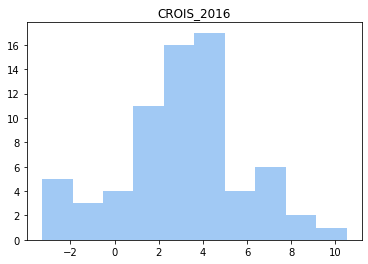

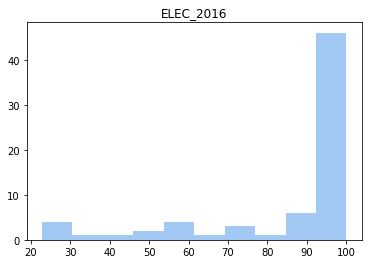

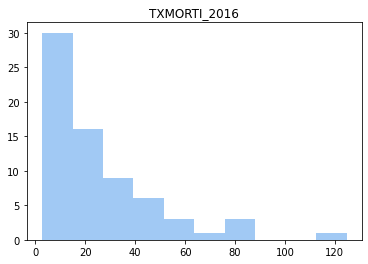

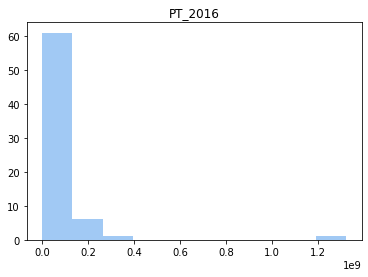

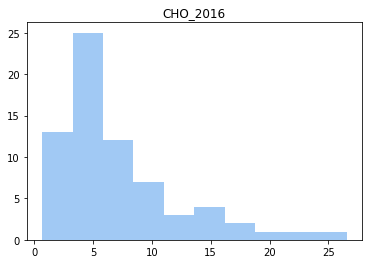

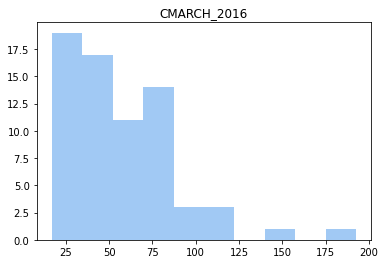

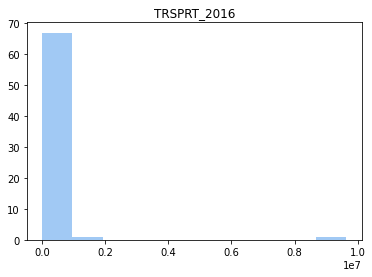

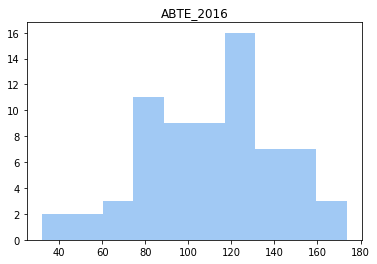

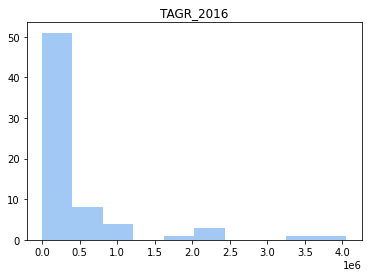

In [282]:
#On génère un histogramme pour chacune des variables

sns.set_palette("pastel")

for i in db_2.columns:
    
    plt.figure()
    plt.title(f'{i}')
    plt.hist(db_2[i])

#ça aurait pu être plus joli avec subplot

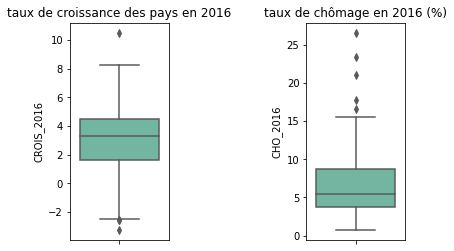

Il semble y avoir des individus potentiellement atypiques pour ces deux variables.


In [288]:
import seaborn as sns

sns.set_palette("Set2")

plt.subplot(1, 3, 1) # row 1, col 2 index 1
plt.title("taux de croissance des pays en 2016")
sns.boxplot(y=db_2['CROIS_2016'])


plt.subplot(1, 3, 3) # row 1, col 2 index 1
plt.title("taux de chômage en 2016 (%)")
sns.boxplot(y=db_2['CHO_2016'])

plt.show()
print("Il semble y avoir des individus potentiellement atypiques pour ces deux variables.")

In [ ]:
#!pip install OUTLIERS
from outliers import smirnov_grubbs as grubbs

#ça fonctionne pas dommage
#de toute façon ici ce n'est pas un test de grubbs car plus d'1 idv potentiellement atypique
#chercher autre méthode

In [291]:
#Fonction pour faire matrice des correlations
def correlation_matrix(df):
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    plt.figure(figsize=(10,10), dpi = 70)
    sns.heatmap(df.corr(), mask=mask, center=0, cmap='RdBu_r', 
                linewidths=1, annot=True, fmt=".2f")
    plt.title('Matrice des corrélations', fontsize = 13, fontweight='bold')
    plt.show()

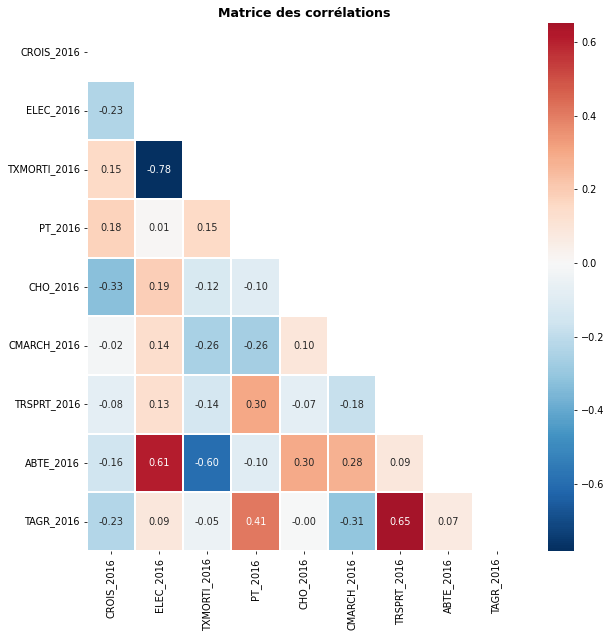

In [292]:
correlation_matrix(db_2)
#comme je ne me souviens pas de la signification de la plupart des variables
#on retiendra que le taux de mortalité est fortement corrélé négativement avec le % de la population ayant 
#accès à l'éléctrécité ou encore que le taux de chômage est relativement corrélé négativement avec le taux de croissance ...

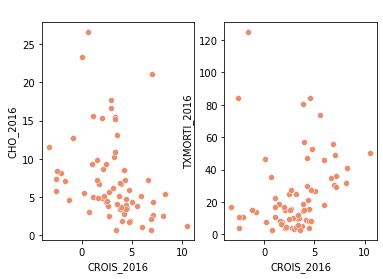

In [307]:
import seaborn as sns

sns.set_palette("flare")

plt.subplot(121)
plot = sns.scatterplot(x='CROIS_2016',y='CHO_2016',data=db_2)

plt.subplot(122) 
plot = sns.scatterplot(x='CROIS_2016',y='TXMORTI_2016',data=db_2)

#j'aimerais bien arriver à les séparer plus mais je n'arrive pas vraiment à manier figsize